The following configurations allow TPOT2 to learn a symbolic classification or regression model.


Leafs: Leaves can either select individual columns or output 1's or 0's.

Inner nodes: arithmetic operators

Root: logistic regression

Symbolic Classification

Generation: 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]


0.8500096024582293


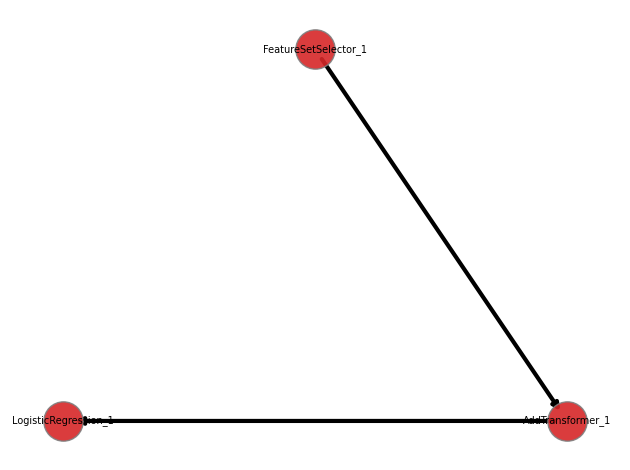

In [1]:
import tpot2
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=100, n_informative=6, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)

n_features = X_train.shape[1]

graph_search_space = tpot2.search_spaces.pipelines.GraphPipeline(
    root_search_space= tpot2.config.get_search_space("LogisticRegression"),
    leaf_search_space = tpot2.search_spaces.nodes.FSSNode(subsets=n_features), 
    inner_search_space = tpot2.config.get_search_space(["arithmatic"]),
    max_size = 10,
)

est = tpot2.TPOTEstimator(population_size=10,generations=20, 
                            scorers=['roc_auc_ovr'],
                            scorers_weights=[1],
                            other_objective_functions=[tpot2.objectives.number_of_nodes_objective],
                            other_objective_functions_weights=[-1],
                            n_jobs=32,
                            classification=True,
                            search_space = graph_search_space ,
                            verbose=1,
                            )

scorer = sklearn.metrics.get_scorer('roc_auc_ovo')

est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))
est.fitted_pipeline_.plot()

In [2]:
# print all hyperparameters
for n in est.fitted_pipeline_.graph.nodes:
    print(n, " : ", est.fitted_pipeline_.graph.nodes[n]['instance'])

LogisticRegression_1  :  LogisticRegression(C=1.7363936958422204, class_weight='balanced', max_iter=1000,
                   n_jobs=1, solver='saga')
AddTransformer_1  :  AddTransformer()
FeatureSetSelector_1  :  FeatureSetSelector(name='84', sel_subset=[84])


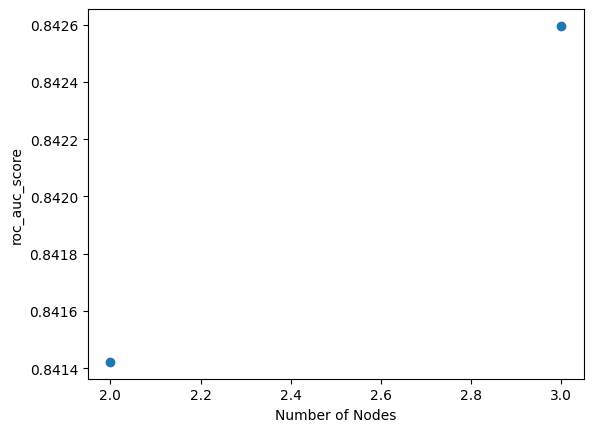

In [3]:
pareto_front = est.evaluated_individuals[est.evaluated_individuals['Pareto_Front'] == 1]

#plot the pareto front of number_of_leaves_objective vs roc_auc_score
import matplotlib.pyplot as plt
plt.scatter(pareto_front['number_of_nodes_objective'], pareto_front['roc_auc_score'])
plt.xlabel('Number of Nodes')
plt.ylabel('roc_auc_score')
plt.show()

Symbolic Regression

Generation: 100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


-4348.811587281301


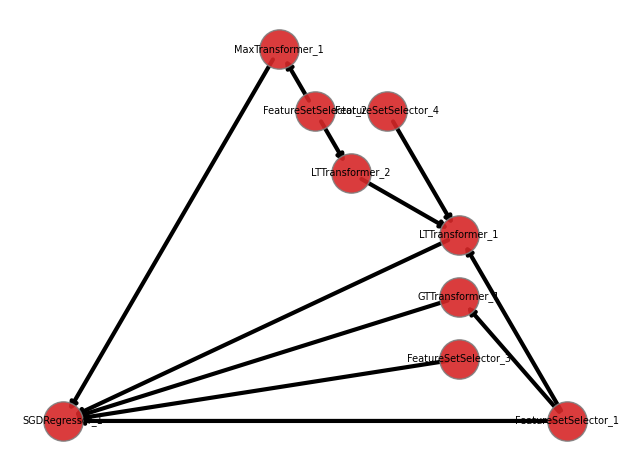

In [4]:
import tpot2
import sklearn.datasets

scorer = sklearn.metrics.get_scorer('neg_mean_squared_error')
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)

graph_search_space = tpot2.search_spaces.pipelines.GraphPipeline(
    root_search_space= tpot2.config.get_search_space("SGDRegressor"),
    leaf_search_space = tpot2.search_spaces.nodes.FSSNode(subsets=X_train.shape[1]), 
    inner_search_space = tpot2.config.get_search_space(["arithmatic"]),
    max_size = 10,
)

est = tpot2.TPOTEstimator(population_size=10,generations=20, 
                            scorers=['neg_mean_squared_error'],
                            scorers_weights=[1],
                            other_objective_functions=[tpot2.objectives.number_of_nodes_objective],
                            other_objective_functions_weights=[-1],
                            n_jobs=32,
                            classification=False,
                            search_space = graph_search_space ,
                            verbose=2,
                            )



est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))
est.fitted_pipeline_.plot()

In [5]:
# print all hyperparameters
for n in est.fitted_pipeline_.graph.nodes:
    print(n, " : ", est.fitted_pipeline_.graph.nodes[n]['instance'])

SGDRegressor_1  :  SGDRegressor(alpha=6.014583593220849e-05, epsilon=2.109266488257155e-05,
             eta0=0.06363149574923024, l1_ratio=2.519434640584705e-06,
             learning_rate='constant', loss='squared_epsilon_insensitive',
             penalty='elasticnet')
FeatureSetSelector_1  :  FeatureSetSelector(name='8', sel_subset=[8])
FeatureSetSelector_2  :  FeatureSetSelector(name='2', sel_subset=[2])
FeatureSetSelector_3  :  FeatureSetSelector(name='9', sel_subset=[9])
GTTransformer_1  :  GTTransformer()
LTTransformer_1  :  LTTransformer()
LTTransformer_2  :  LTTransformer()
FeatureSetSelector_4  :  FeatureSetSelector(name='1', sel_subset=[1])
MaxTransformer_1  :  MaxTransformer()


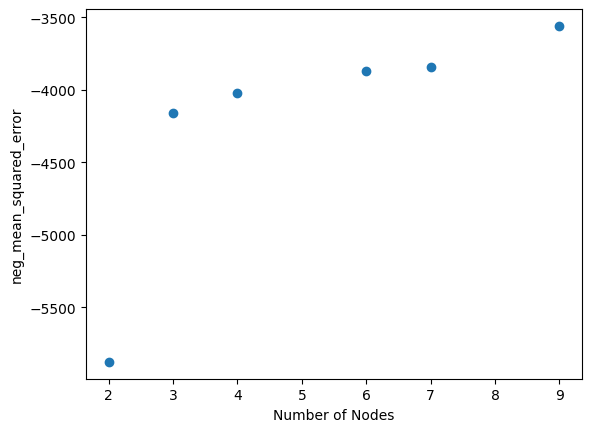

In [6]:
pareto_front = est.evaluated_individuals[est.evaluated_individuals['Pareto_Front'] == 1]

#plot the pareto front of number_of_leaves_objective vs roc_auc_score
import matplotlib.pyplot as plt
plt.scatter(pareto_front['number_of_nodes_objective'], pareto_front['mean_squared_error'])
plt.xlabel('Number of Nodes')
plt.ylabel('neg_mean_squared_error')
plt.show()